In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_context('poster')

# Current way to label anomalies

```python
threshold=600

data['err'] = data['duration']-data['prediction']

def f(x):
    if x<=threshold:
        return 'normal'
    else:
        return 'anomaly'

data['correct_label']= data['err'].apply(lambda x : f(x))
data=data.drop('err', axis=1)
```

In [4]:
file='data/rucio_transfer-events-2017.08.06.csv'
data = pd.read_csv(file)
data = data.drop('Unnamed: 0', axis=1)
# data=data.set_index(['submitted_at'])
print(data.head(5), '\n --------------------- \n')
data.info()

          submitted_at      bytes   delay        activity  \
0  2017-07-30 09:17:20  122408123  575780  Data Brokering   
1  2017-07-30 09:17:20  135263354  576506  Data Brokering   
2  2017-07-30 09:17:20  124532770  573012  Data Brokering   
3  2017-07-30 09:17:20  116879660  576749  Data Brokering   
4  2017-07-30 09:17:20  120500070  576590  Data Brokering   

                            dst-rse dst-type protocol  \
0  CA-VICTORIA-WESTGRID-T2_DATADISK     DISK      srm   
1  CA-VICTORIA-WESTGRID-T2_DATADISK     DISK      srm   
2  CA-VICTORIA-WESTGRID-T2_DATADISK     DISK      srm   
3  CA-VICTORIA-WESTGRID-T2_DATADISK     DISK      srm   
4  CA-VICTORIA-WESTGRID-T2_DATADISK     DISK      srm   

                        src-rse src-type                 transfer-endpoint  \
0  CA-MCGILL-CLUMEQ-T2_DATADISK     DISK  https://fts.usatlas.bnl.gov:8446   
1  CA-MCGILL-CLUMEQ-T2_DATADISK     DISK  https://fts.usatlas.bnl.gov:8446   
2  CA-MCGILL-CLUMEQ-T2_DATADISK     DISK  https://fts.us

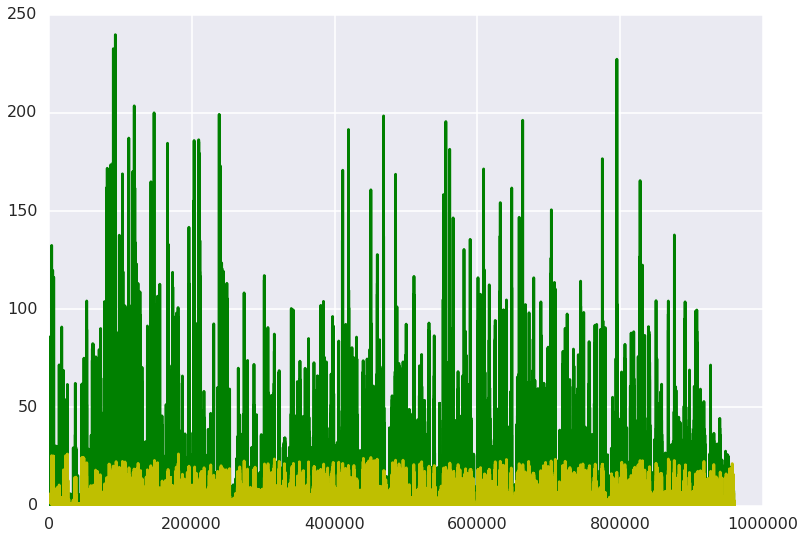

In [36]:
plt.plot(data['duration'] / 60, 'g')
plt.plot(data['prediction']/ 60, 'y')
# data['duration'].plot()
# data['prediction'].plot()
plt.show()

(959439,)
(959439, 1)


/cvmfs/sft.cern.ch/lcg/releases/numpy/1.11.0-43867/x86_64-slc6-gcc62-opt/lib/python3.5/site-packages/numpy-1.11.0-py3.5-linux-x86_64.egg/numpy/core/fromnumeric.py:225: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return reshape(newshape, order=order)


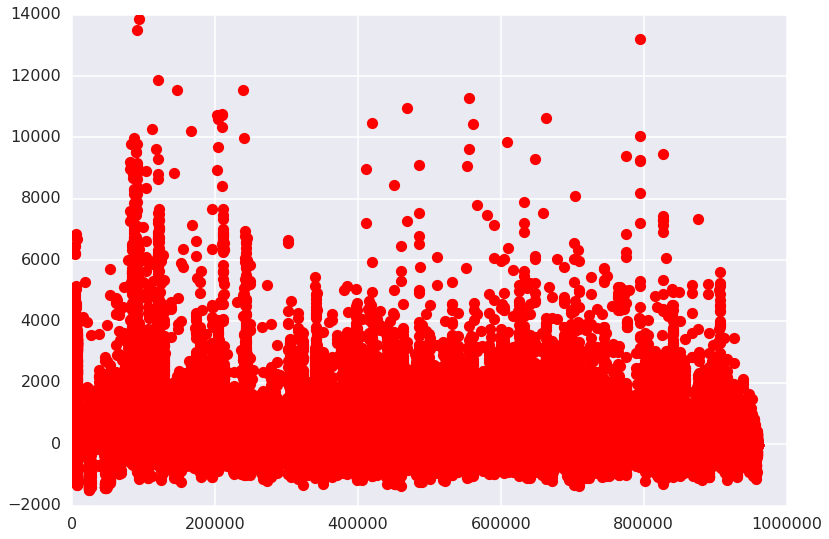

In [37]:
errors= data['duration'] - data['prediction']
print(errors.shape)
errors=np.reshape(errors, [errors.shape[0],1])
print(errors.shape)
plt.plot(errors, 'or')

plt.show()

231.138602702


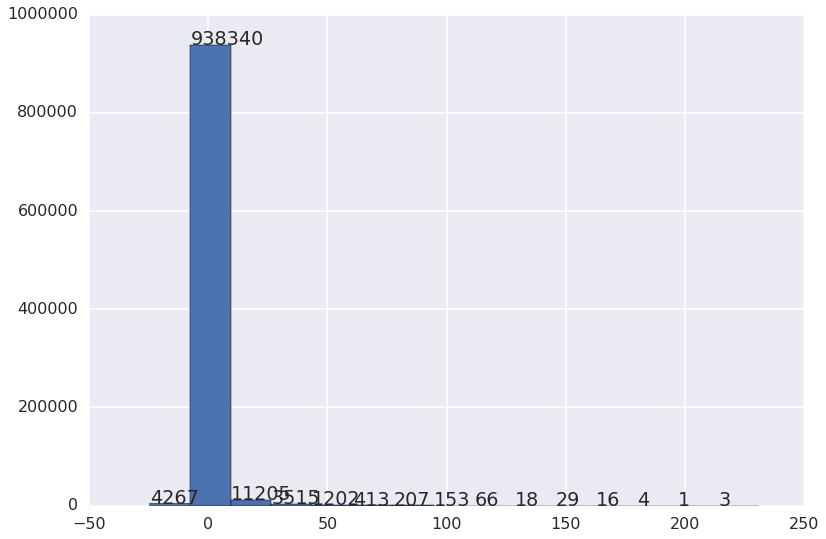

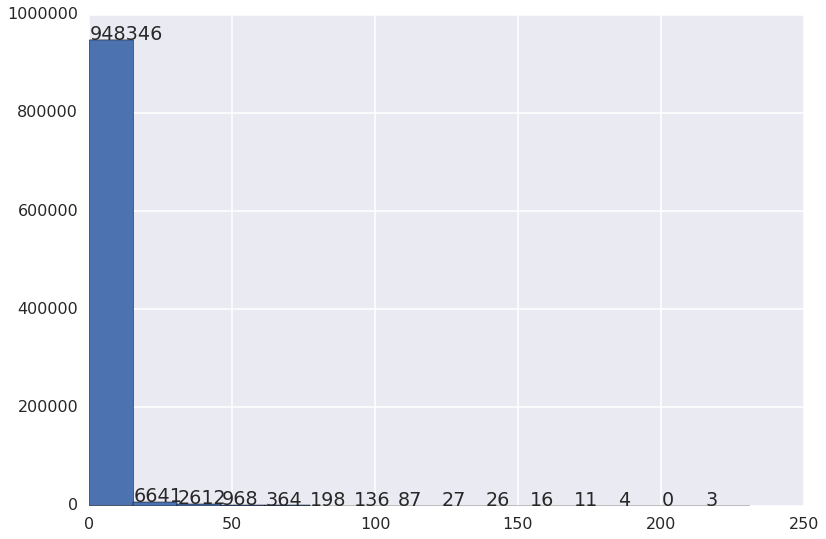

total values with error less than 1 minutes : 786547  percentage :81.97988616264296 %
total values with error less than 2 minutes : 833907  percentage :86.91610409833245 %
total values with error less than 3 minutes : 866016  percentage :90.26274729294931 %
total values with error less than 5 minutes : 909586  percentage :94.80394272069407 %
total values with error less than 10 minutes : 941233  percentage :98.10243277582003 %
total values with error less than 30 minutes : 954773  percentage :99.51367413665693 %
total values with error more than an hour : 940  percentage :0.09797392017626967 %
total values with negative errors i.e transfers faster tha predicted by the model(positive anomalies) : 794346  percentage :82.79275701738203 %
max error :231.13860270182292  minutes


In [38]:
errs = errors/60
print(np.max(errs))

bins=15
# bins=[-20,-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55,60]
arr= plt.hist(errs, bins=bins)
for i in range(bins):
    plt.text(arr[1][i],arr[0][i],str(int(arr[0][i])))
plt.show()

arr2 = plt.hist(np.absolute(errs), bins=bins)
for i in range(bins):
    plt.text(arr2[1][i],arr2[0][i],str(int(arr2[0][i])))
plt.show()


i_1=0
i_2=0
i_3 = 0
i_4 = 0
i_5 = 0
i_10 = 0
i_20 = 0
i_30=0
i_40 =0
i_50 = 0
i_60=0
j=0
k=0
for err in errors:
    if err<=0:
        k+=1
    if np.absolute(err/ 60)<=1:
        i+=1
    if np.absolute(err/ 60)<=2:
        i_2+=1
    if np.absolute(err/ 60)<=3:
        i_3+=1
    if np.absolute(err/ 60)<=4:
        i_4+=1
    if np.absolute(err/ 60)<=5:
        i_5+=1
    if np.absolute(err/ 60)<=10:
        i_10+=1
    if np.absolute(err/ 60)<=20:
        i_20+=1
    if np.absolute(err/ 60)<=30:
        i_30+=1
    if np.absolute(err/ 60)<=40:
        i_40+=1
    if np.absolute(err/ 60)<=50:
        i_50+=1
    if np.absolute(err/ 60)<=60:
        i_60+=1
    else:
        j+=1
print('total values with error less than 1 minutes : {}  percentage :{} %'.format(i, (i/len(errors) *100)))
print('total values with error less than 2 minutes : {}  percentage :{} %'.format(i_2, (i_2/len(errors) *100)))
print('total values with error less than 3 minutes : {}  percentage :{} %'.format(i_3, (i_3/len(errors) *100)))
print('total values with error less than 5 minutes : {}  percentage :{} %'.format(i_5, (i_5/len(errors) *100)))
print('total values with error less than 10 minutes : {}  percentage :{} %'.format(i_10, (i_10/len(errors) *100)))
print('total values with error less than 30 minutes : {}  percentage :{} %'.format(i_30, (i_30/len(errors) *100)))
print('total values with error more than an hour : {}  percentage :{} %'.format(j, (j/len(errors) *100)))
print('total values with negative errors i.e transfers faster tha predicted by the model(positive anomalies) : {}  percentage :{} %'.format(k, (k/len(errors) *100)))
max_err = np.max(np.absolute(errors))
print('max error :{}  minutes'.format(max_err/60))

In [39]:
# sns.barplot(x='submitted_at', y=err_min, data=data)

# Scatterplots

In [40]:
cond = data['label']=='anomaly'
anomalies= data[cond]
normal_data = data[cond!=True]
assert len(normal_data)+len(anomalies)==len(data)


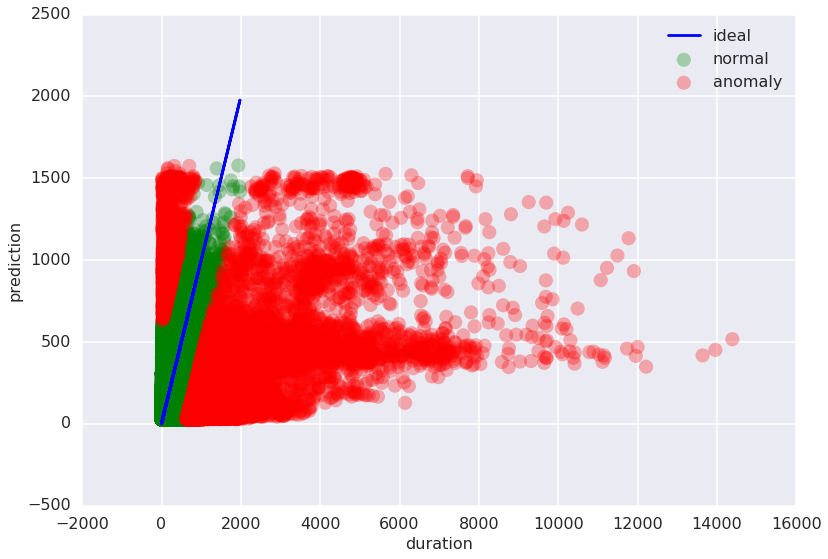

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1, 1,1)
# x_norm = []
# y_norm = []
# x_anom = []
# y_anom = []
ax.scatter(normal_data['duration'], normal_data['prediction'],c='green', s=200.0, label='normal', alpha=0.3, edgecolors='none')
ax.scatter(anomalies['duration'], anomalies['prediction'],c='red', s=200.0, label='anomaly', alpha=0.3, edgecolors='none')
ax.plot(normal_data['duration'],normal_data['duration'], 'b', label='ideal')
# ax.plot(data['duration'], data['duration'], 'y', label='reality')
ax.legend()
plt.xlabel('duration', fontsize=16)
plt.ylabel('prediction', fontsize=16)

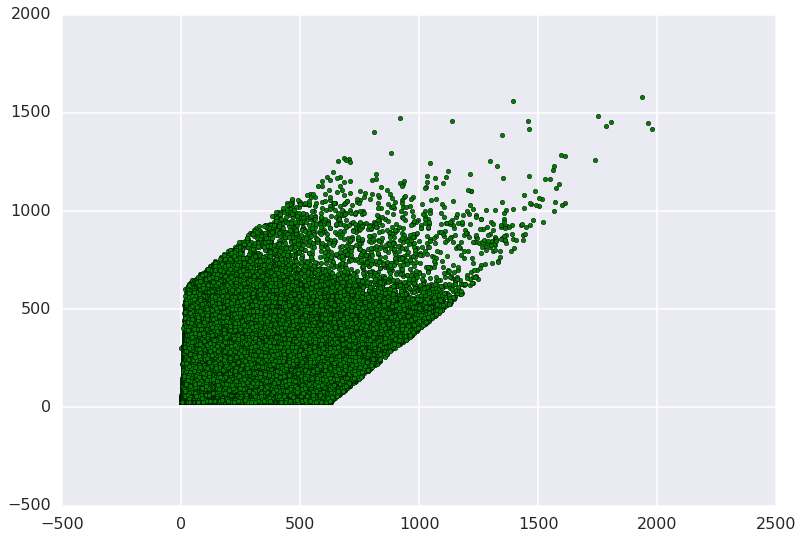

In [43]:
plt.scatter(normal_data['duration'], normal_data['prediction'], c='green')

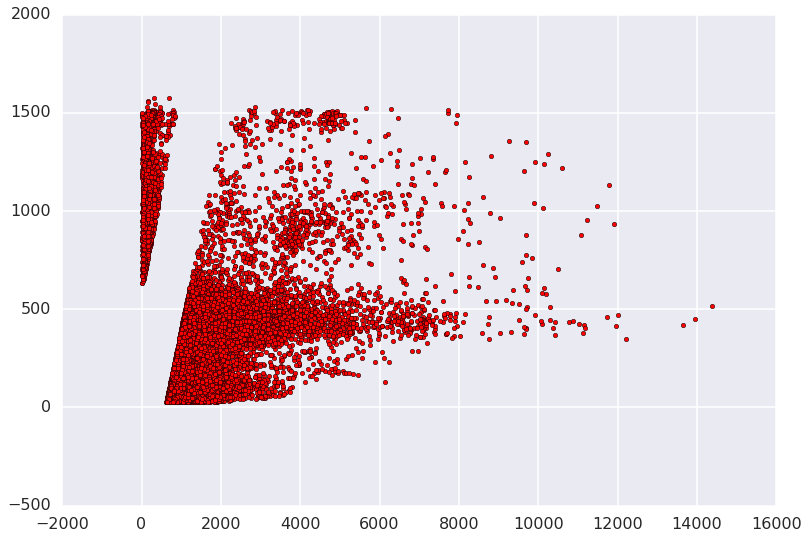

In [44]:
plt.scatter(anomalies['duration'], anomalies['prediction'], c='red')

In [45]:
anomalies.shape

(18206, 15)

In [46]:
normal_data.shape

(941233, 15)

In [47]:
print('% of anomalies from {} events = {:.3f} % ; ({}) '.format(data.shape[0], (anomalies.shape[0]/data.shape[0])*100,anomalies.shape[0]))

% of anomalies from 959439 events = 1.898 % ; (18206) 


In [48]:
anomalies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18206 entries, 247 to 958245
Data columns (total 15 columns):
submitted_at         18206 non-null object
bytes                18206 non-null int64
delay                18206 non-null int64
activity             18206 non-null object
dst-rse              18206 non-null object
dst-type             18206 non-null object
protocol             18206 non-null object
src-rse              18206 non-null object
src-type             18206 non-null object
transfer-endpoint    18206 non-null object
duration             18206 non-null int64
prediction           18206 non-null float64
name                 18206 non-null object
scope                18206 non-null object
label                18206 non-null object
dtypes: float64(1), int64(3), object(11)
memory usage: 2.2+ MB


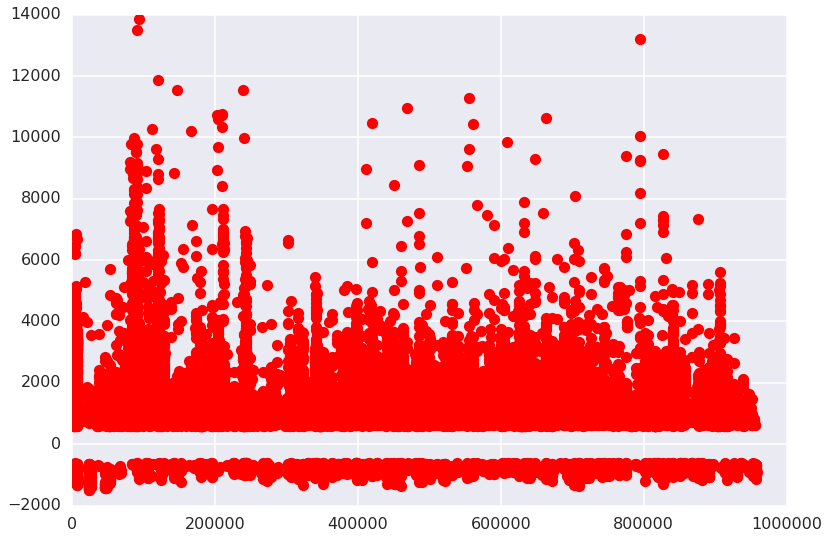

In [49]:
delta= anomalies['duration']-anomalies['prediction']
plt.plot(delta, 'ro')
plt.show()

(array([2585, 3047, 1390,  881, 1087, 7107,  651,  577,  737,  142,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    1]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]))

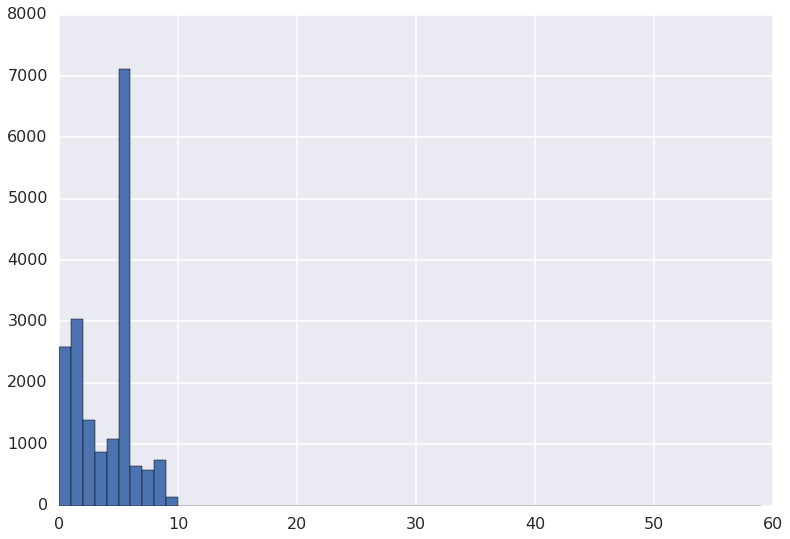

In [50]:
size_gb=anomalies['bytes']/1073741824
# print(size_gb.value_counts())

count, division = np.histogram(size_gb, bins = range(0,60))
size_gb.hist(bins=division)
count,division

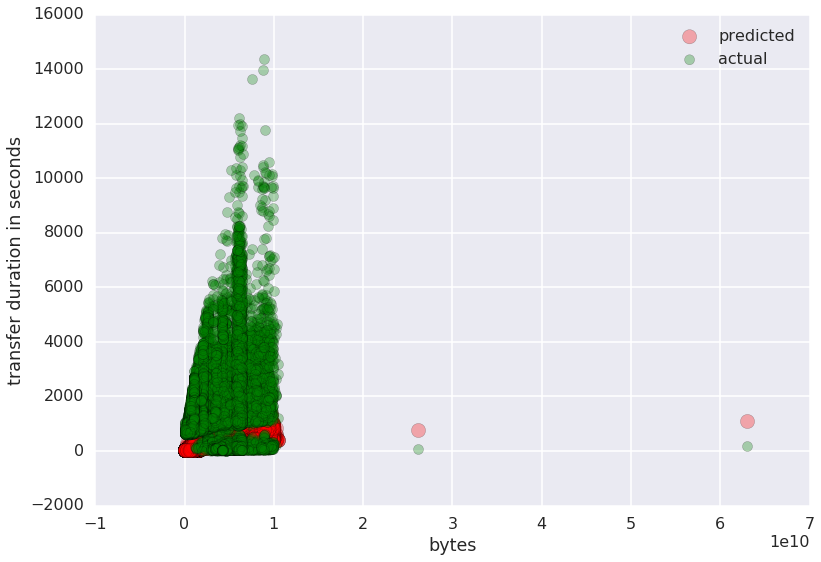

In [51]:
c

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959439 entries, 0 to 959438
Data columns (total 16 columns):
submitted_at         959439 non-null object
bytes                959439 non-null int64
delay                959439 non-null int64
activity             959439 non-null object
dst-rse              959439 non-null object
dst-type             959439 non-null object
protocol             959439 non-null object
src-rse              959439 non-null object
src-type             959439 non-null object
transfer-endpoint    959439 non-null object
duration             959439 non-null int64
prediction           959439 non-null float64
name                 959439 non-null object
scope                959439 non-null object
label                959439 non-null object
correct_label        959439 non-null object
dtypes: float64(1), int64(3), object(12)
memory usage: 117.1+ MB


# Label anomalies --- using a simple threshold..improved version --ignore "positive anomalies"

In [61]:
threshold=600

data['err'] = data['duration']-data['prediction']

def f(x):
    if x<=threshold:
        return 'normal'
    else:
        return 'anomaly'

data['correct_label']= data['err'].apply(lambda x : f(x))
data=data.drop('err', axis=1)
data.head()

,submitted_at,bytes,delay,activity,dst-rse,dst-type,protocol,src-rse,src-type,transfer-endpoint,duration,prediction,name,scope,label,correct_label
0,2017-07-30 09:17:20,122408123,575780,Data Brokering,CA-VICTORIA-WESTGRID-T2_DATADISK,DISK,srm,CA-MCGILL-CLUMEQ-T2_DATADISK,DISK,https://fts.usatlas.bnl.gov:8446,340,178.408798,DAOD_EXOT6.10324571._000373.pool.root.1,data16_13TeV,normal,normal
1,2017-07-30 09:17:20,135263354,576506,Data Brokering,CA-VICTORIA-WESTGRID-T2_DATADISK,DISK,srm,CA-MCGILL-CLUMEQ-T2_DATADISK,DISK,https://fts.usatlas.bnl.gov:8446,352,179.033554,DAOD_EXOT6.10324571._000648.pool.root.1,data16_13TeV,normal,normal
2,2017-07-30 09:17:20,124532770,573012,Data Brokering,CA-VICTORIA-WESTGRID-T2_DATADISK,DISK,srm,CA-MCGILL-CLUMEQ-T2_DATADISK,DISK,https://fts.usatlas.bnl.gov:8446,348,178.594116,DAOD_EXOT6.10324571._000294.pool.root.1,data16_13TeV,normal,normal
3,2017-07-30 09:17:20,116879660,576749,Data Brokering,CA-VICTORIA-WESTGRID-T2_DATADISK,DISK,srm,CA-MCGILL-CLUMEQ-T2_DATADISK,DISK,https://fts.usatlas.bnl.gov:8446,341,178.657272,DAOD_EXOT6.10324571._000103.pool.root.1,data16_13TeV,normal,normal
4,2017-07-30 09:17:20,120500070,576590,Data Brokering,CA-VICTORIA-WESTGRID-T2_DATADISK,DISK,srm,CA-MCGILL-CLUMEQ-T2_DATADISK,DISK,https://fts.usatlas.bnl.gov:8446,336,178.830124,DAOD_EXOT6.10324571._000320.pool.root.1,data16_13TeV,normal,normal


In [62]:
cond = data['correct_label']=='anomaly'
anomalies= data[cond]
normal_data = data[cond!=True]
assert len(normal_data)+len(anomalies)==len(data)


In [63]:
len(anomalies)

15909

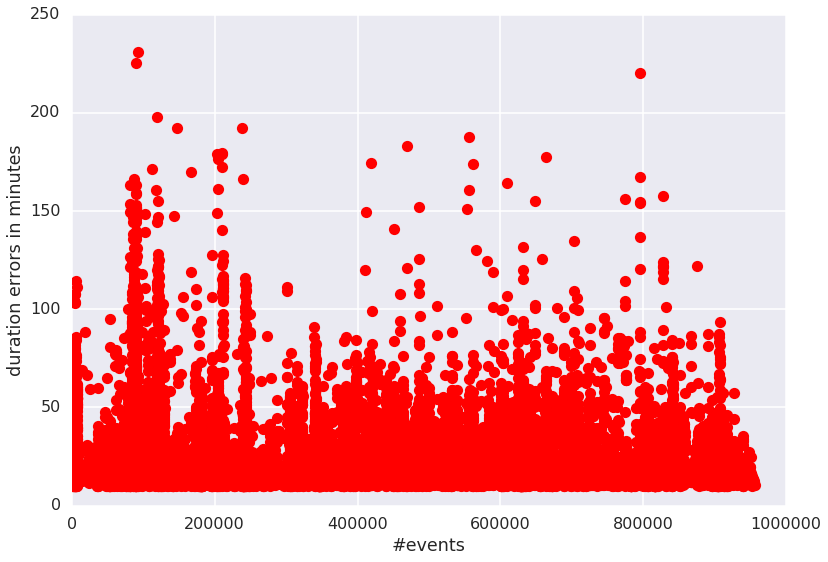

In [75]:
delta= anomalies['duration']-anomalies['prediction']
delta= delta/60
plt.plot(delta, 'ro')
plt.xlabel('#events')
plt.ylabel('duration errors in minutes')
plt.show()

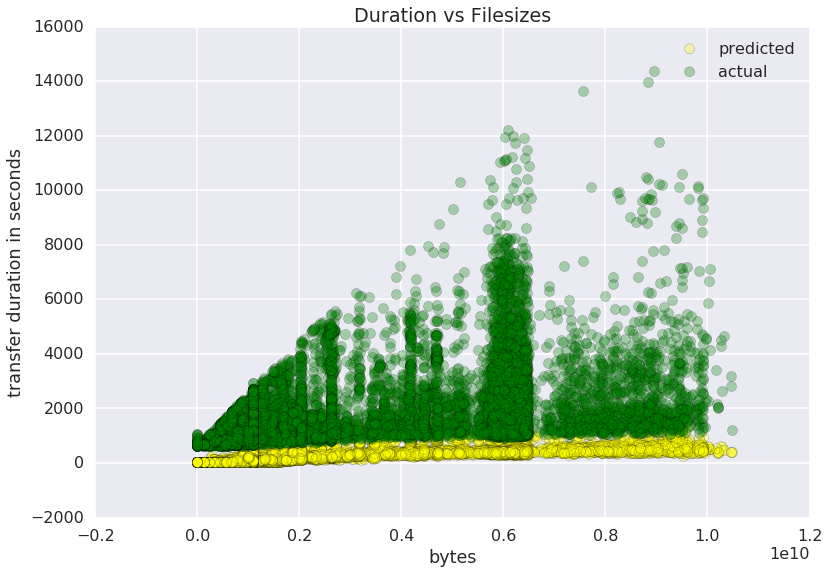

In [69]:
plt.scatter(anomalies['bytes'], anomalies['prediction'], c='yellow', alpha=0.3,  s=100, edgecolors=None, label='predicted')
plt.scatter(anomalies['bytes'], anomalies['duration'], c='green',alpha=0.3, s=100, edgecolors=None, label='actual')
plt.xlabel('bytes')
plt.ylabel('transfer duration in seconds')
plt.title('Duration vs Filesizes')
plt.legend()

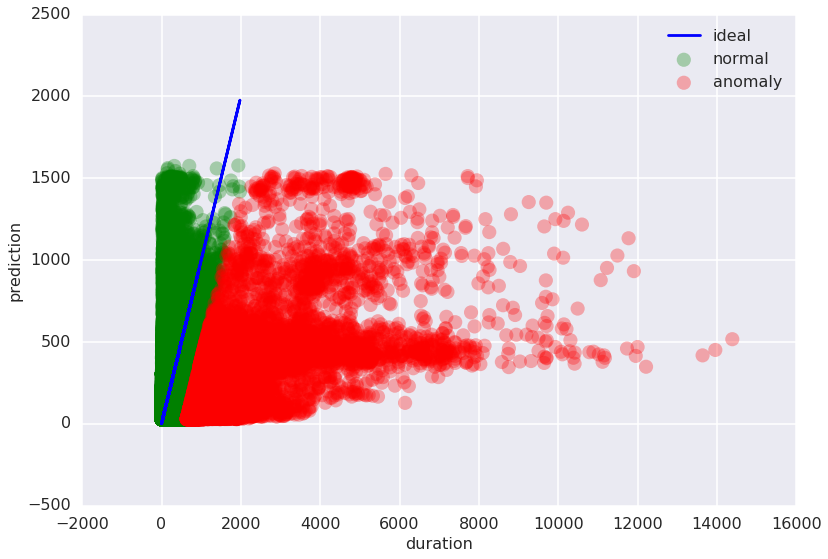

In [66]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(normal_data['duration'], normal_data['prediction'],c='green', s=200.0, label='normal', alpha=0.3, edgecolors='none')
ax.scatter(anomalies['duration'], anomalies['prediction'],c='red', s=200.0, label='anomaly', alpha=0.3, edgecolors='none')
ax.plot(normal_data['duration'],normal_data['duration'], 'b', label='ideal')
# ax.plot(data['duration'], data['duration'], 'y', label='reality')
ax.legend()
plt.xlabel('duration', fontsize=16)
plt.ylabel('prediction', fontsize=16)

(array([2585, 3027, 1152,  647,  715, 6151,  546,  478,  511,   97,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]))

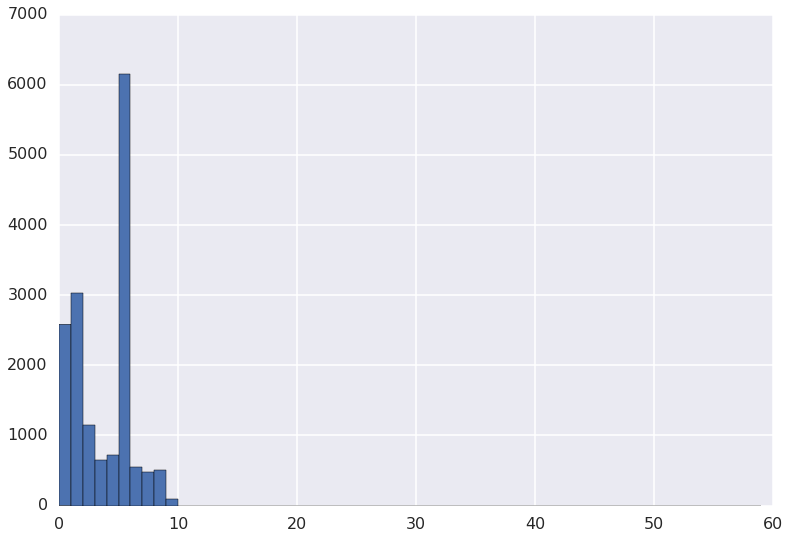

In [76]:
size_gb=anomalies['bytes']/1073741824
# print(size_gb.value_counts())

count, division = np.histogram(size_gb, bins = range(0,60))
size_gb.hist(bins=division)
count,division

In [86]:
c= data['bytes']>=10*1073741824
v= data[c]
v.head()

,submitted_at,bytes,delay,activity,dst-rse,dst-type,protocol,src-rse,src-type,transfer-endpoint,duration,prediction,name,scope,label,correct_label
26000,2017-08-04 09:16:31,62998410333,138751,Data Rebalancing,CA-SFU-T2_LOCALGROUPDISK,DISK,srm,SFU-LCG2_LOCALGROUPDISK,DISK,https://fts.usatlas.bnl.gov:8446,170,1091.095825,hhskim.root,user.qbuat,anomaly,normal
26787,2017-08-04 09:17:01,26195635150,145970,Data Rebalancing,CA-SFU-T2_LOCALGROUPDISK,DISK,srm,SFU-LCG2_LOCALGROUPDISK,DISK,https://fts.usatlas.bnl.gov:8446,76,768.271118,user.ggrossi.7528706._000002.minitrees.root.2,user.ggrossi,anomaly,normal
129306,2017-08-06 00:24:41,15030263377,3,User Subscriptions,LRZ-LMU_LOCALGROUPDISK,DISK,srm,UKI-LT2-QMUL_SCRATCHDISK,DISK,https://fts3.cern.ch:8446,245,606.708252,user.flfische.11842975._000123.output.root,user.flfische,normal,normal
773261,2017-08-06 18:54:22,10810368141,226,Data Brokering,UKI-LT2-RHUL_DATADISK,DISK,srm,GRIF-LAL_DATADISK,DISK,https://fts3-test.gridpp.rl.ac.uk:8446,319,451.521240,DAOD_SUSY1.09521042._000015.pool.root.1,mc15_13TeV,normal,normal
773267,2017-08-06 18:54:22,10870067201,246,Data Brokering,UKI-LT2-RHUL_DATADISK,DISK,srm,GRIF-LAL_DATADISK,DISK,https://fts3-test.gridpp.rl.ac.uk:8446,207,455.881317,DAOD_SUSY1.09521042._000025.pool.root.1,mc15_13TeV,normal,normal


In [87]:
v.shape

(16, 16)

In [88]:
v

,submitted_at,bytes,delay,activity,dst-rse,dst-type,protocol,src-rse,src-type,transfer-endpoint,duration,prediction,name,scope,label,correct_label
26000,2017-08-04 09:16:31,62998410333,138751,Data Rebalancing,CA-SFU-T2_LOCALGROUPDISK,DISK,srm,SFU-LCG2_LOCALGROUPDISK,DISK,https://fts.usatlas.bnl.gov:8446,170,1091.095825,hhskim.root,user.qbuat,anomaly,normal
26787,2017-08-04 09:17:01,26195635150,145970,Data Rebalancing,CA-SFU-T2_LOCALGROUPDISK,DISK,srm,SFU-LCG2_LOCALGROUPDISK,DISK,https://fts.usatlas.bnl.gov:8446,76,768.271118,user.ggrossi.7528706._000002.minitrees.root.2,user.ggrossi,anomaly,normal
129306,2017-08-06 00:24:41,15030263377,3,User Subscriptions,LRZ-LMU_LOCALGROUPDISK,DISK,srm,UKI-LT2-QMUL_SCRATCHDISK,DISK,https://fts3.cern.ch:8446,245,606.708252,user.flfische.11842975._000123.output.root,user.flfische,normal,normal
773261,2017-08-06 18:54:22,10810368141,226,Data Brokering,UKI-LT2-RHUL_DATADISK,DISK,srm,GRIF-LAL_DATADISK,DISK,https://fts3-test.gridpp.rl.ac.uk:8446,319,451.521240,DAOD_SUSY1.09521042._000015.pool.root.1,mc15_13TeV,normal,normal
773267,2017-08-06 18:54:22,10870067201,246,Data Brokering,UKI-LT2-RHUL_DATADISK,DISK,srm,GRIF-LAL_DATADISK,DISK,https://fts3-test.gridpp.rl.ac.uk:8446,207,455.881317,DAOD_SUSY1.09521042._000025.pool.root.1,mc15_13TeV,normal,normal
773271,2017-08-06 18:54:22,10765436105,539,Data Brokering,UKI-LT2-RHUL_DATADISK,DISK,srm,GRIF-LAL_DATADISK,DISK,https://fts3-test.gridpp.rl.ac.uk:8446,309,517.828125,DAOD_SUSY1.09521042._000039.pool.root.1,mc15_13TeV,normal,normal
773273,2017-08-06 18:54:22,10908399397,469,Data Brokering,UKI-LT2-RHUL_DATADISK,DISK,srm,GRIF-LAL_DATADISK,DISK,https://fts3-test.gridpp.rl.ac.uk:8446,269,526.369019,DAOD_SUSY1.09521042._000021.pool.root.1,mc15_13TeV,normal,normal
773276,2017-08-06 18:54:22,10861828536,253,Data Brokering,UKI-LT2-RHUL_DATADISK,DISK,srm,GRIF-LAL_DATADISK,DISK,https://fts3-test.gridpp.rl.ac.uk:8446,308,522.161438,DAOD_SUSY1.09521042._000042.pool.root.1,mc15_13TeV,normal,normal
773277,2017-08-06 18:54:22,10823564316,107,Data Brokering,UKI-LT2-RHUL_DATADISK,DISK,srm,GRIF-LAL_DATADISK,DISK,https://fts3-test.gridpp.rl.ac.uk:8446,199,524.675720,DAOD_SUSY1.09521042._000038.pool.root.1,mc15_13TeV,normal,normal
828851,2017-08-06 20:20:01,10786270658,3,Data Brokering,UKI-LT2-RHUL_DATADISK,DISK,srm,GRIF-LAL_DATADISK,DISK,https://fts3-test.gridpp.rl.ac.uk:8446,184,441.788910,DAOD_SUSY1.09521042._000034.pool.root.1,mc15_13TeV,normal,normal


In [80]:
data['activity'].unique()

array(['Data Brokering', 'User Subscriptions', 'Data Consolidation',
       'Data Rebalancing', 'T0 Export', 'Production Input', 'Express',
       'Production Output', 'Functional Test', 'T0 Tape', 'Staging'], dtype=object)

In [91]:
a=data['activity']=='Data Rebalancing'
a=data[a]

,submitted_at,bytes,delay,activity,dst-rse,dst-type,protocol,src-rse,src-type,transfer-endpoint,duration,prediction,name,scope,label,correct_label
313,2017-07-30 14:41:23,463233179,564269,Data Rebalancing,FMPHI-UNIBA_DATADISK,DISK,srm,BNL-OSG2_DATADISK,DISK,https://fts3.cern.ch:8446,210,240.719345,DAOD_FTAG1.10609018._000312.pool.root.1,data16_13TeV,normal,normal
317,2017-07-30 15:21:42,804478586,555901,Data Rebalancing,FMPHI-UNIBA_DATADISK,DISK,srm,BNL-OSG2_DATADISK,DISK,https://fts3.cern.ch:8446,2070,240.319595,DAOD_FTAG1.10609018._000671.pool.root.1,data16_13TeV,anomaly,anomaly
556,2017-07-30 18:55:19,507675018,548790,Data Rebalancing,FMPHI-UNIBA_DATADISK,DISK,srm,BNL-OSG2_DATADISK,DISK,https://fts3.cern.ch:8446,243,228.386887,DAOD_FTAG1.10609018._000116.pool.root.1,data16_13TeV,normal,normal
1464,2017-07-30 20:44:22,285535559,579238,Data Rebalancing,FMPHI-UNIBA_DATADISK,DISK,srm,BNL-OSG2_DATADISK,DISK,https://fts3.cern.ch:8446,1135,312.224182,DAOD_STDM9.10323695._000265.pool.root.1,data15_13TeV,anomaly,anomaly
2047,2017-07-30 22:00:13,40285315,535500,Data Rebalancing,FMPHI-UNIBA_DATADISK,DISK,srm,BNL-OSG2_DATADISK,DISK,https://fts3.cern.ch:8446,79,224.502045,EVNT.01072159._002830.pool.root.1,mc12_8TeV,normal,normal
2048,2017-07-30 22:41:36,40182534,584311,Data Rebalancing,FMPHI-UNIBA_DATADISK,DISK,srm,BNL-OSG2_DATADISK,DISK,https://fts3.cern.ch:8446,147,232.047791,EVNT.01072159._003764.pool.root.1,mc12_8TeV,normal,normal
2050,2017-07-30 23:01:34,524771097,596600,Data Rebalancing,FMPHI-UNIBA_DATADISK,DISK,srm,BNL-OSG2_DATADISK,DISK,https://fts3.cern.ch:8446,316,244.249466,DAOD_FTAG1.10609018._000084.pool.root.1,data16_13TeV,normal,normal
2053,2017-07-30 23:21:54,917715174,533134,Data Rebalancing,FMPHI-UNIBA_DATADISK,DISK,srm,BNL-OSG2_DATADISK,DISK,https://fts3.cern.ch:8446,2020,258.916534,DAOD_FTAG1.10609018._000557.pool.root.1,data16_13TeV,anomaly,anomaly
2057,2017-07-30 23:44:06,460221414,549390,Data Rebalancing,FMPHI-UNIBA_DATADISK,DISK,srm,BNL-OSG2_DATADISK,DISK,https://fts3.cern.ch:8446,240,229.870789,DAOD_FTAG1.10609018._000389.pool.root.1,data16_13TeV,normal,normal
2058,2017-07-30 23:53:51,40444387,535806,Data Rebalancing,FMPHI-UNIBA_DATADISK,DISK,srm,BNL-OSG2_DATADISK,DISK,https://fts3.cern.ch:8446,156,235.602005,EVNT.01072159._000485.pool.root.1,mc12_8TeV,normal,normal


[904326  28485  10458   4917   2856   2085   1424   1139    913    596
    413    340    298    202    161    165    120     93     64     49
     46     51     45     51     23     19     15     11      6      8
      4      6     15      8      8      2      3      4      1      5
      1      0      0      0      0      1      1] [  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235]


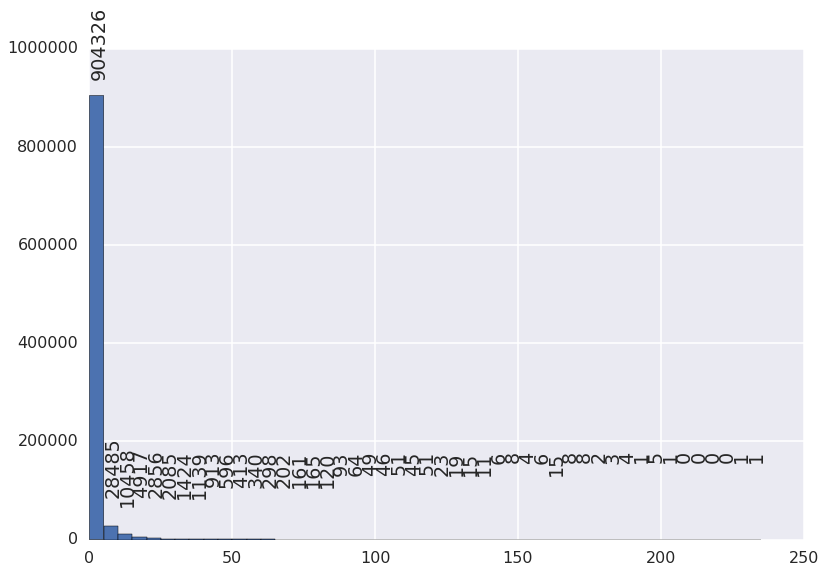

[882285  70429   4160   1844    650] [ 0  5 10 15 20 25]


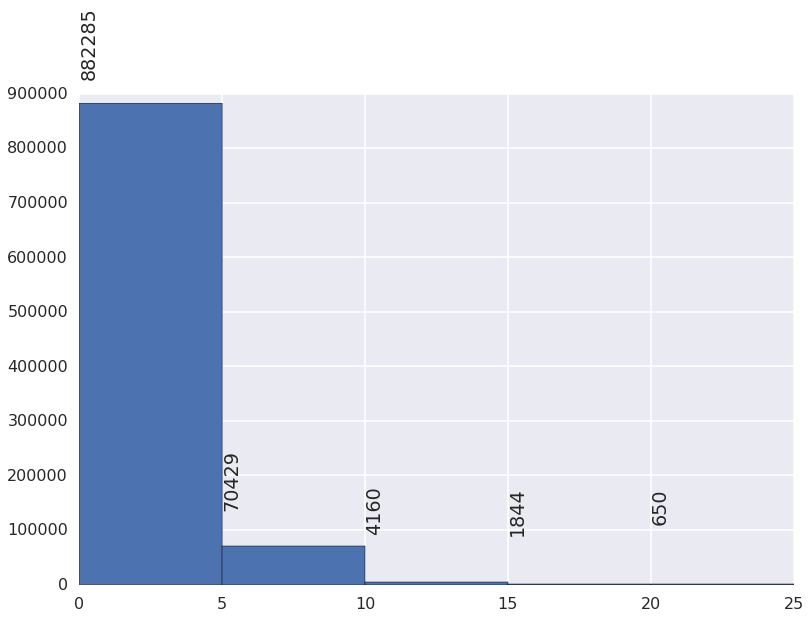

In [17]:
duration_minutes=data['duration']/60
bins=range(0,int(np.max(duration_minutes)), 5)
count, division = np.histogram(duration_minutes, bins = range(0,int(np.max(duration_minutes)), 5))
duration_minutes.hist(bins=division)
print(count,division)
for i in range(0,len(bins)-1):
    plt.text(division[i],count[i]+150000,str(int(count[i])), rotation=90)
plt.show()

duration_minutes=data['prediction']/60
bins=range(0,int(np.max(duration_minutes)), 5)
count, division = np.histogram(duration_minutes, bins = range(0,int(np.max(duration_minutes)), 5))
duration_minutes.hist(bins=division)
print(count,division)
for i in range(0,len(bins)-1):
    plt.text(division[i],count[i]+150000,str(int(count[i])), rotation=90)
    